### exploratory-data-analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
dt = pd.read_csv("House_Rent_Dataset.csv")
dt.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


#### correlation : magnitude of relationship b/w continuous variables

In [3]:
dt.dtypes

Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object

BHK, Size, Bathroom were originally continuous variables <br>
others continuous variables seen above were converted to dummy variables

In [4]:
cont_vars = ["BHK","Size","Bathroom"]
dt[cont_vars].corr()

,BHK,Size,Bathroom
BHK,1.000000,0.716145,0.794885
Size,0.716145,1.000000,0.740703
Bathroom,0.794885,0.740703,1.000000


Lets visualize these relationships using scatter plots

(0.0, 8399.5)

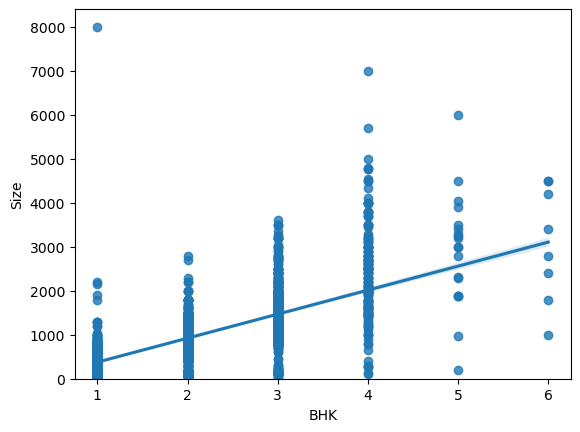

In [5]:
sns.regplot(y="Size",x="BHK",data=dt)
plt.ylim(0,)

(0.0, 8399.5)

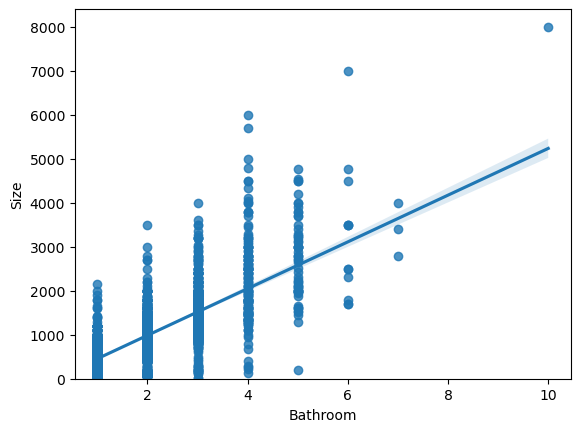

In [6]:
sns.regplot(y="Size",x="Bathroom",data=dt)
plt.ylim(0,)

Clearly Bathroom and BHK are not continuous but discrete count variables

In [7]:
dt[["Rent","Size"]].corr()

,Rent,Size
Rent,1.000000,0.413551
Size,0.413551,1.000000


Since correlation coefficient b/w Rent and Size is 0.42 is b/w 0.3 and 0.5 <br>
therefore we have moderate linear correlation b/w Rent and Size of flat

(0.0, 22980.881364963818)

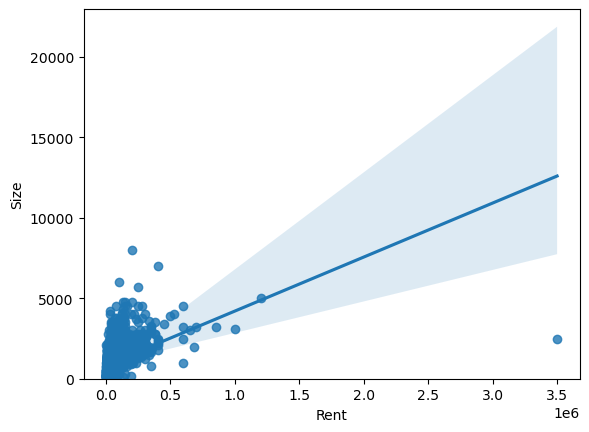

In [8]:
sns.regplot(y="Size",x='Rent',data=dt)
plt.ylim(0,)

Clearly we have more categorical variables in our dataset <br>
a good way to visualize them is through boxplots

<Axes: xlabel='BHK', ylabel='Rent'>

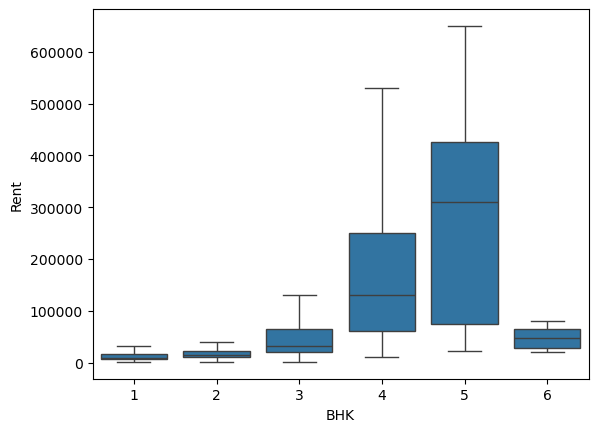

In [20]:
sns.boxplot(x="BHK",y="Rent",data=dt,showfliers=False)
#plt.ylim(0.0e+6,1.0e+6)

<Axes: xlabel='Bathroom', ylabel='Rent'>

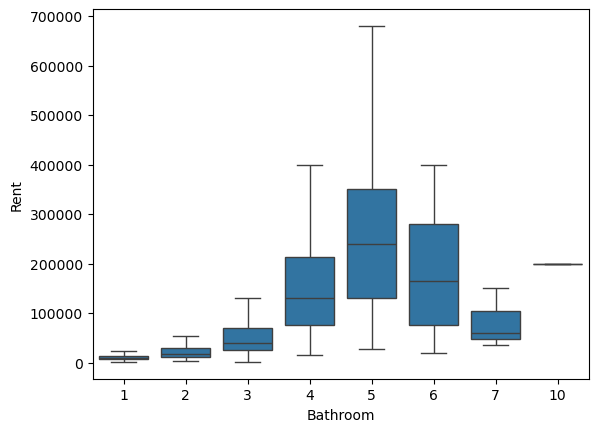

In [19]:
sns.boxplot(x="Bathroom",y="Rent",data=dt,showfliers=False)
#plt.ylim(0.0e+6,1.0e+6)

In [12]:
dt.dtypes

Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object

<Axes: xlabel='Furnishing Status', ylabel='Rent'>

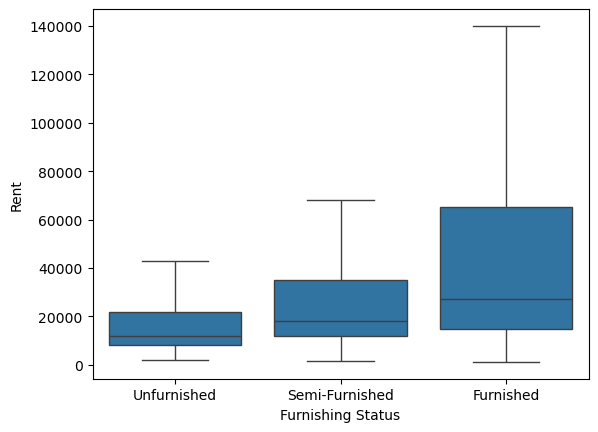

In [18]:
sns.boxplot(x="Furnishing Status",y='Rent',data=dt,showfliers=False)
#plt.ylim(0.0e+6,150000)

<Axes: xlabel='Tenant Preferred', ylabel='Rent'>

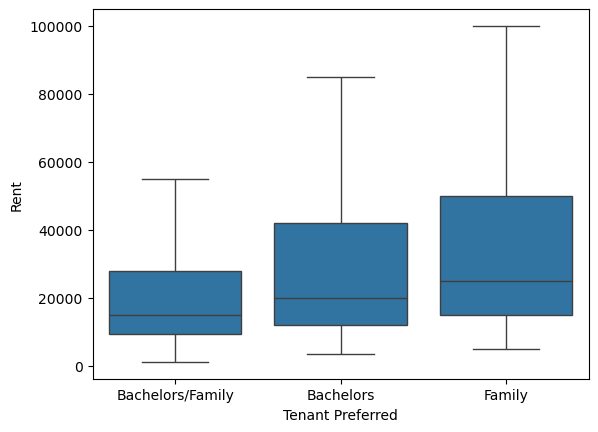

In [21]:
sns.boxplot(x="Tenant Preferred",y='Rent',data=dt,showfliers=False)

<Axes: xlabel='City', ylabel='Rent'>

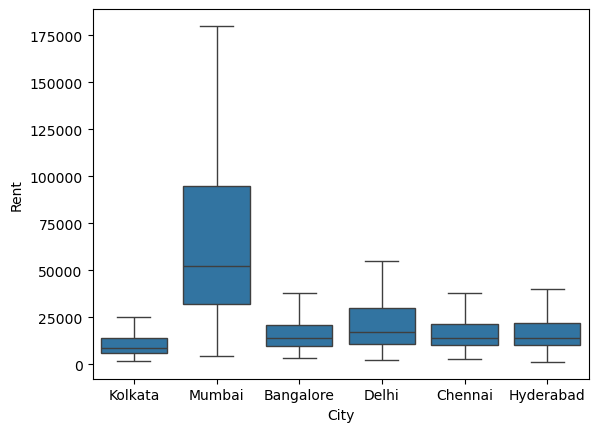

In [22]:
sns.boxplot(x="City",y='Rent',data=dt,showfliers=False)

In [26]:
dt["Area Type"].value_counts()

Area Type
Super Area     2446
Carpet Area    2298
Built Area        2
Name: count, dtype: int64

<Axes: xlabel='Area Type', ylabel='Rent'>

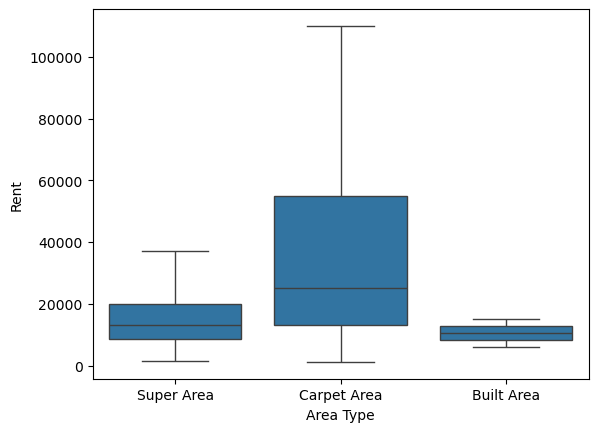

In [28]:
sns.boxplot(x="Area Type",y="Rent",data=dt,showfliers=False)

<Axes: xlabel='Point of Contact', ylabel='Rent'>

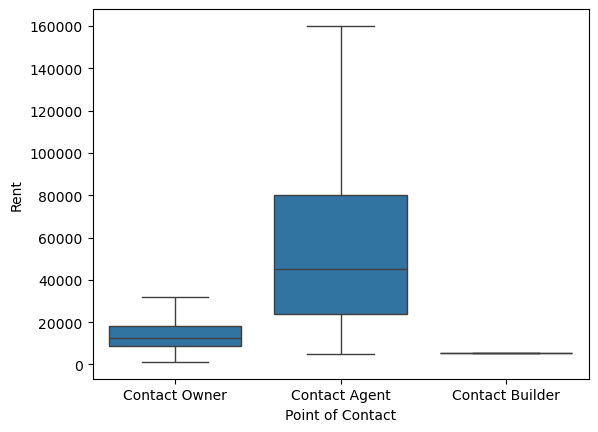

In [32]:
sns.boxplot(x="Point of Contact",y='Rent',data=dt,showfliers=False)

### Grouping and Pivot tables

In [33]:
dt_group_one = dt[["Point of Contact","Rent"]]
dt_group_one.head()

,Point of Contact,Rent
0,Contact Owner,10000
1,Contact Owner,20000
2,Contact Owner,17000
3,Contact Owner,10000
4,Contact Owner,7500


In [34]:
dt_group_one.groupby(["Point of Contact"],as_index=False)

In [35]:
dt_group_one.groupby(["Point of Contact"],as_index=False).mean()

,Point of Contact,Rent
0,Contact Agent,73481.158927
1,Contact Builder,5500.000000
2,Contact Owner,16704.206468


In [36]:
dt_group_two = dt[["Point of Contact","BHK","Rent"]]
dt_group_two.head()

,Point of Contact,BHK,Rent
0,Contact Owner,2,10000
1,Contact Owner,2,20000
2,Contact Owner,2,17000
3,Contact Owner,2,10000
4,Contact Owner,2,7500


In [37]:
dt_group_two.groupby(["Point of Contact","BHK"],as_index=False).mean()

,Point of Contact,BHK,Rent
0,Contact Agent,1,24009.110749
1,Contact Agent,2,44708.409346
2,Contact Agent,3,87885.001898
3,Contact Agent,4,200736.301370
4,Contact Agent,5,396923.076923
5,Contact Agent,6,280000.000000
6,Contact Builder,1,5500.000000
7,Contact Owner,1,10621.859139
8,Contact Owner,2,15126.533526
9,Contact Owner,3,26308.663748


when we group using more than one variable it becomes difficult to visualize <br>
this is where we use pivot tables

In [39]:
dt_group_two = dt_group_two.groupby(["Point of Contact","BHK"],as_index=False).mean()
grouped_pivot = dt_group_two.pivot(index="Point of Contact",columns="BHK")
grouped_pivot

Rent                                             \
BHK                          1             2             3              4   
Point of Contact                                                            
Contact Agent     24009.110749  44708.409346  87885.001898  200736.301370   
Contact Builder    5500.000000           NaN           NaN            NaN   
Contact Owner     10621.859139  15126.533526  26308.663748   60648.860465   

                                                
BHK                           5              6  
Point of Contact                                
Contact Agent     396923.076923  280000.000000  
Contact Builder             NaN            NaN  
Contact Owner      82083.333333   43571.428571

Missing data is filled with zero here, but could be filled with other values too 

In [40]:
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot

Rent                                             \
BHK                          1             2             3              4   
Point of Contact                                                            
Contact Agent     24009.110749  44708.409346  87885.001898  200736.301370   
Contact Builder    5500.000000      0.000000      0.000000       0.000000   
Contact Owner     10621.859139  15126.533526  26308.663748   60648.860465   

                                                
BHK                           5              6  
Point of Contact                                
Contact Agent     396923.076923  280000.000000  
Contact Builder        0.000000       0.000000  
Contact Owner      82083.333333   43571.428571

In [42]:
dt_group_three = dt[["BHK","Rent"]]
dt_group_three.groupby(["BHK"],as_index=False).mean()

,BHK,Rent
0,1,14139.223650
1,2,22113.864018
2,3,55863.062842
3,4,168864.555556
4,5,297500.000000
5,6,73125.000000


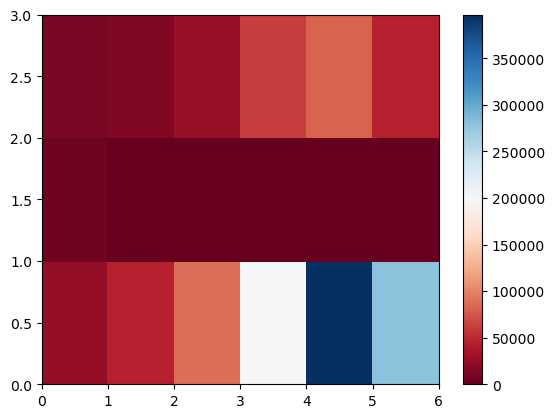

In [44]:
plt.pcolor(grouped_pivot,cmap="RdBu")
plt.colorbar()
plt.show()

In [46]:
grouped_pivot.columns.levels[1]

Index([1, 2, 3, 4, 5, 6], dtype='int64', name='BHK')

In [47]:
grouped_pivot.index

Index(['Contact Agent', 'Contact Builder', 'Contact Owner'], dtype='object', name='Point of Contact')

In [51]:
np.arange(grouped_pivot.shape[1])+0.5

array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5])

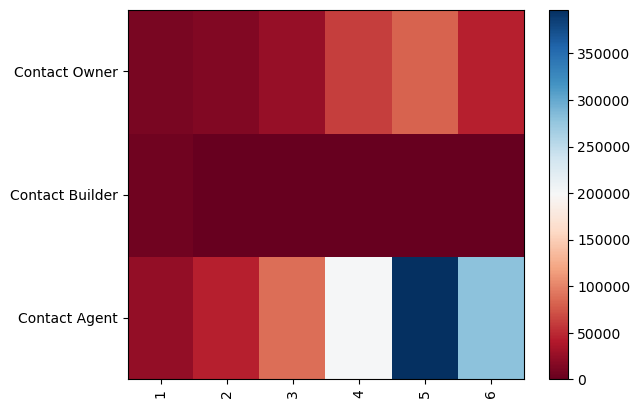

In [52]:
fig,ax = plt.subplots()
im = ax.pcolor(grouped_pivot,cmap='RdBu')

row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

ax.set_xticks(np.arange(grouped_pivot.shape[1])+0.5,minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0])+0.5,minor=False)

ax.set_xticklabels(row_labels)
ax.set_yticklabels(col_labels)

plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

### Correlation and Causation

In [53]:
from scipy import stats

### Size vs Rent

In [59]:
pearson_coef , p_value = stats.pearsonr(dt['Size'],dt['Rent'])
print('The pearson correlation coefficient is',round(pearson_coef,2)," with a p-value of P = ",p_value)

The pearson correlation coefficient is 0.41  with a p-value of P =  1.6908729308724296e-195


since p-value is less than 0.001 correlation b/w Size and Rent is statistically significant

### ANOVA

In [67]:
dt_group_one = dt[["Point of Contact","Rent"]]
dt_group_one = dt_group_one.groupby(["Point of Contact"])
dt_group_one.head(2)

,Point of Contact,Rent
0,Contact Owner,10000
1,Contact Owner,20000
6,Contact Agent,10000
7,Contact Agent,5000
4061,Contact Builder,5500


In [64]:
dt_group_one.get_group('Contact Owner')["Rent"]

0       10000
1       20000
2       17000
3       10000
4        7500
        ...  
4739    25000
4740    12000
4741    15000
4742    29000
4745    15000
Name: Rent, Length: 3216, dtype: int64

In [68]:
f_val,p_val = stats.f_oneway(dt_group_one.get_group('Contact Owner')["Rent"],dt_group_one.get_group('Contact Agent')["Rent"],dt_group_one.get_group('Contact Builder')["Rent"])
print( "ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 309.47673014359066 , P = 4.681611702108631e-127


there is statistically significant difference b/w means of three groups <br>
but we need to check if there is significant difference b/w each pair of groups (Post-Hoc)<br> 

In [69]:
f_val,p_val = stats.f_oneway(dt_group_one.get_group('Contact Owner')["Rent"],dt_group_one.get_group('Contact Agent')["Rent"])
print( "ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 618.792300699478 , P = 1.7116933486660572e-128


In [70]:
f_val,p_val = stats.f_oneway(dt_group_one.get_group('Contact Builder')["Rent"],dt_group_one.get_group('Contact Agent')["Rent"])
print( "ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 0.2921461095449428 , P = 0.5889272980572415


In [72]:
f_val,p_val = stats.f_oneway(dt_group_one.get_group('Contact Owner')["Rent"],dt_group_one.get_group('Contact Builder')["Rent"])
print( "ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 0.2781847485791479 , P = 0.597929866563701
